# Titanic : Machin Learning From Disaster
### Prdeict survival on the Titanic
- Defining the problem statement
- Collection the data
- Exploratory data analysis
- Feature engineering
- Modeling
- Testing

# 1 - Defining the problem statement
complete the analysis of what sorts of people were likley to survive.
In particular, we want to apply the tools of machine learning to predict wich passenger survived the Titanic tragedy.


# 2 - Collceting the data

training data set and testing data set are given by Kaggle

### load train, test dataset using Pandas

In [10]:
import pandas as pd
import numpy as np

In [11]:
train = pd.read_csv(r'C:\Users\RenderKar\OneDrive\Desktop\Taitanic_project\data\train.csv')
test = pd.read_csv(r'C:\Users\RenderKar\OneDrive\Desktop\Taitanic_project\data\test.csv')

# 3- Exploratory data analysis

Printing first 5 rows of the train dataset

In [12]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
- Survived: 0 = No, 1 = Yes
- Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- SibSp: # of Sibling / Spouse aboard the Titanic
- Parch: # of parents / children aboard the titanic
- Cabin: Cabin number
- Embarked: Port of Embarketion C = Cherbourge, Q = Queenstown, S = Southampton

**Total rows and columns**

we can see that there are 891 rows and 12 columns in our training dataset.

In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
train.shape

(891, 12)

In [15]:
test.shape

(418, 11)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


We can see that Age value is missing for many rows,

Out of 891 rows, the Age value is present only in 714 rows

Similary, Cabin values are also missing in many rows.Only 204 out of 891 rows Cabin values.

In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 177 rows with missing Age, 787 rows with missing Cabin and 2 rows with missing Embarked information.

### import python lib for visualization

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline   
# for inline  show
import seaborn as sns
sns.set() # setting seaborn defualt for plots 

### Bar Chart for Categurical Features
- Pclass
- Sex
- SibSp
- Parch
- Embarked
- Cabin

In [21]:
def chart(feature):
   df = train.groupby('Survived')[feature].value_counts().unstack().fillna(0)
   df.index= ['Dead', 'Survived']
   df = df.reindex(sorted(df.columns), axis=1)
   df.plot(kind='bar', stacked=False, figsize=(10,5))

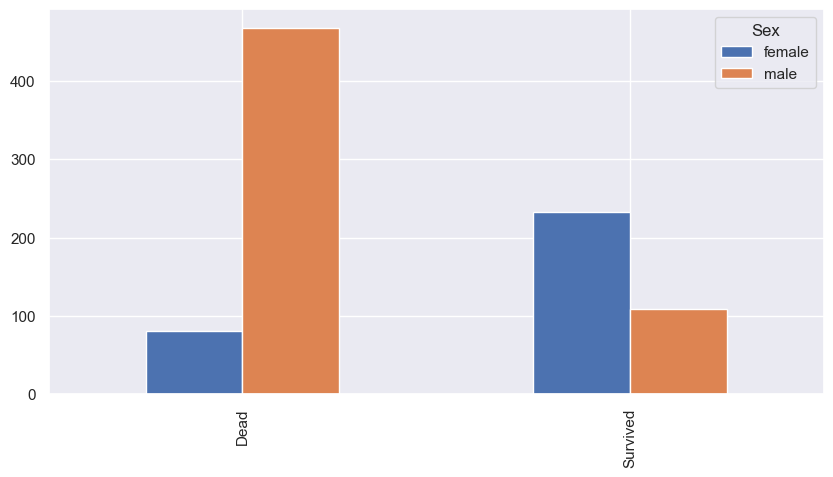

In [22]:
chart('Sex')

The Chart confirms **Women** more likely survived than **Men**

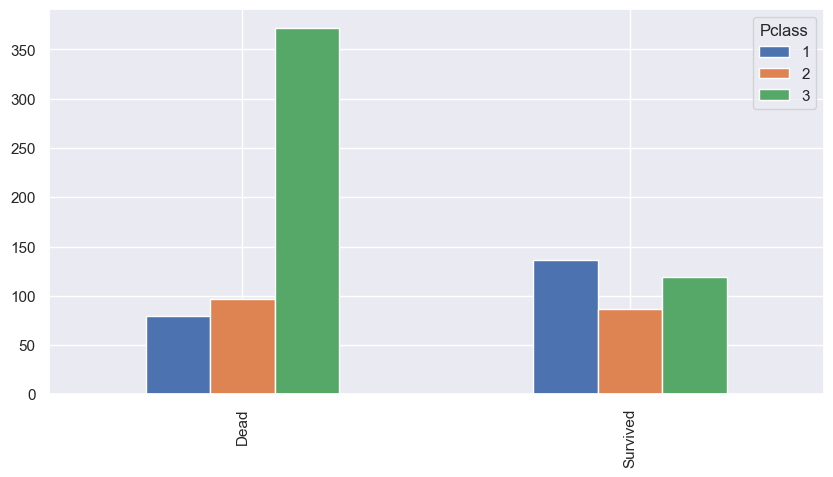

In [23]:
chart('Pclass')

The Chart confirms **1st class** more likely survived than **other classes**    
The Chart confirms **3rd class** more likely dead than **other classes**

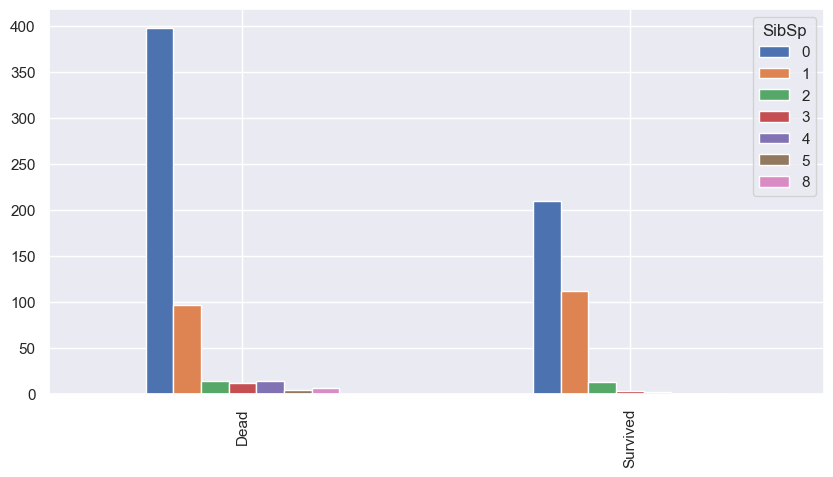

In [24]:
chart('SibSp')

The Chart confirms **a person aboarded with more than 2 siblings or spouse** more likely survived   
THe Chart confirms **a person aboarded without sibling or spouse** more likely dead

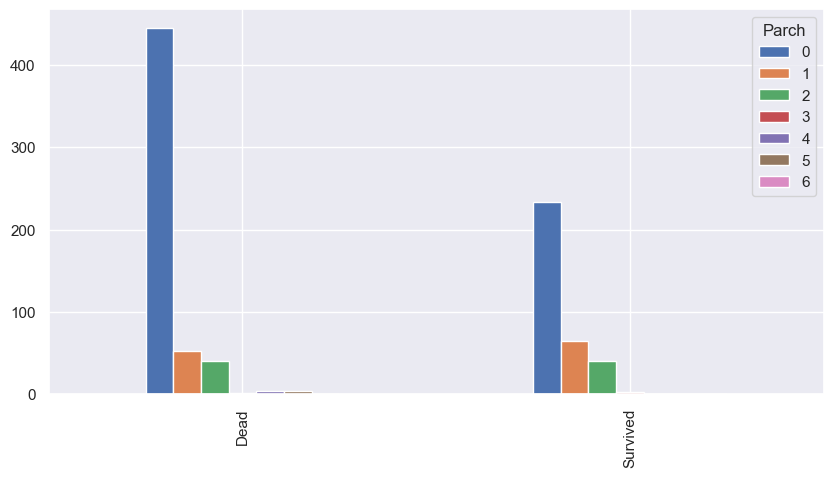

In [25]:
chart('Parch')

The Chart confirms **a person aboarded with more than 2 parents or children** more likely survived  
The chart confirms **a person aboarded alone** more likely dead

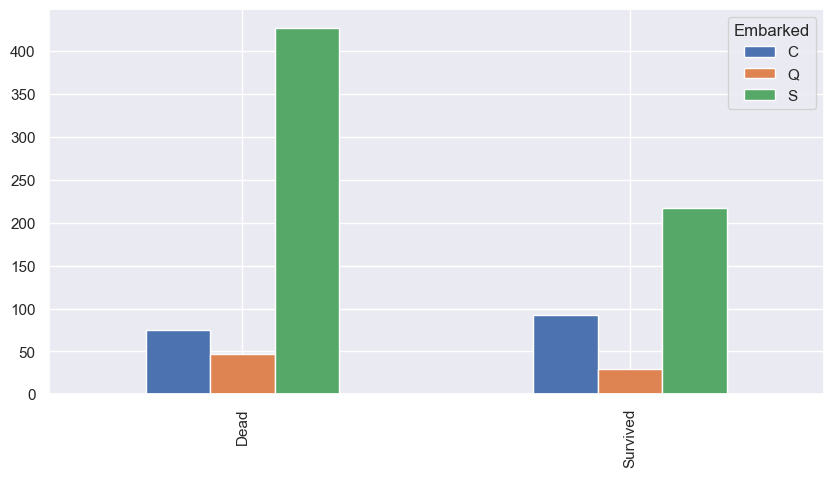

In [26]:
chart('Embarked')

The Chart confirms **a person abaorded from C** slightly more likely survived   
The Chart confirms **a person aboarded from Q** more likely dead    
The Chart confirms **a person aboarded from S** more likely dead    

## 4. Feature Engineering   

Feature engineering is the process of using domain knowledge of the data
to create feature (**feature vectors**) that make machin learning algorithms work.

feature vectors is an n-dimensional vector of numerical feature that represent some object. 
Many algorithms in machine learning require a numerical representation of objects,  
since such represntation facilitate processing and statistical analysis.

### 4.1 how titanic sank?   
sank from the bow of ship where third class rooms located   
conclusion, Pclass is key feature for classifire

### 4.2 Name

In [27]:
train_test_data = [train, test] #combining train and test dataset 

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [28]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [29]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

#### Title map  
Mr : 0  
Miss : 1    
Mrs : 2     
Others : 3

In [30]:
title_map = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 3, 'Rev': 3, 'Col': 3,
             'Major': 3, 'Mlle': 3, 'Countess': 3, 'Ms': 3, 'Lady': 3,
             'Jonkheer': 3, 'Don': 3, 'Dona': 3, 'Mme': 3, 'Capt': 3, 'Sir': 3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_map)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [32]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


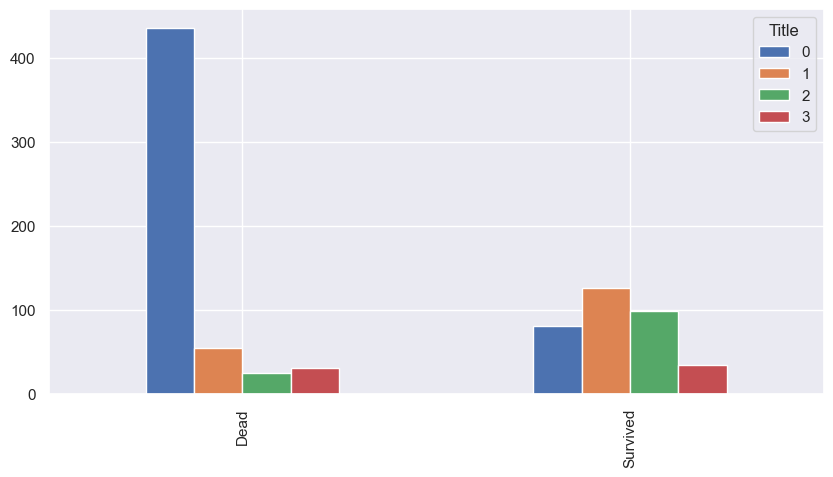

In [33]:
chart('Title')

In [34]:
# delete innecessary feature dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [36]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


### 4.3 Sex 

male: 0     
female: 1

In [37]:
sex_maping = {'male': 0, 'female': 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_maping)

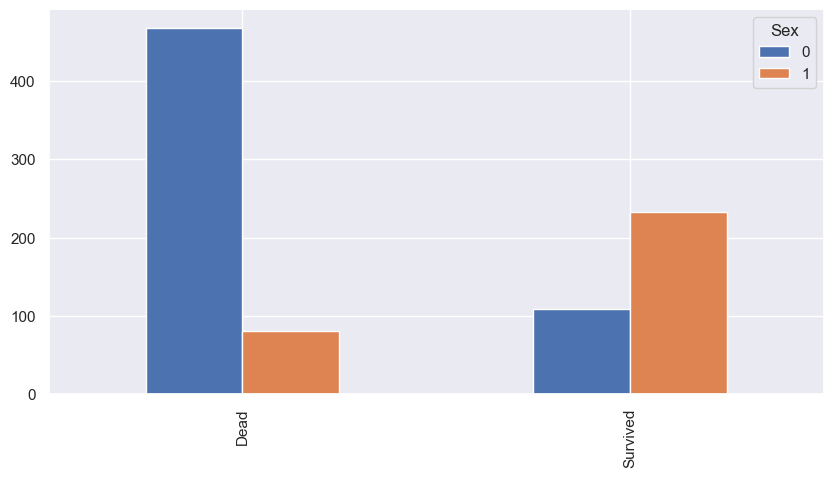

In [38]:
chart('Sex')

### 4.4 Age

### 4.4.1 some age is missing   
Let's use Title's median age for missing Age

In [39]:
pd.set_option('display.max_rows', None) #for Show all 100 columns

In [40]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.00,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.00,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.00,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.00,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.00,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.00,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.00,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.00,1,0,237736,30.0708,NaN,C,2


In [41]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train['Age'] = train['Age'].fillna(train.groupby('Title')['Age'].transform('median'))
test['Age'] = test['Age'].fillna(test.groupby('Title')['Age'].transform('median'))

In [42]:
train.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [43]:
test.head(30)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2
5,897,3,0,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,1,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,0,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,1,18.0,0,0,2657,7.2292,NaN,C,2
9,901,3,0,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [44]:
train['Age'].isnull().sum()

np.int64(0)

In [45]:
test['Age'].isnull().sum()

np.int64(0)

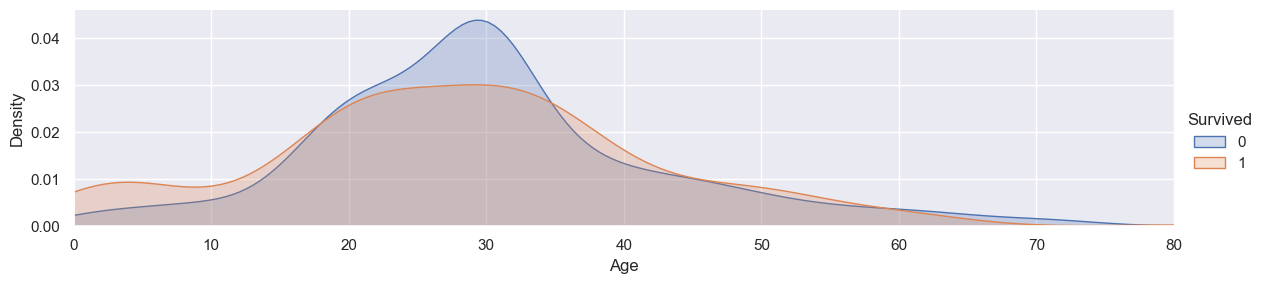

In [46]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

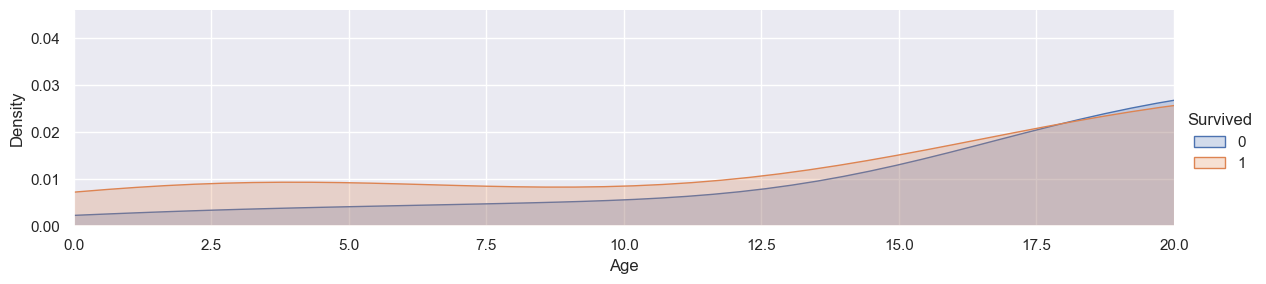

In [47]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()

plt.xlim(0, 20)

(20.0, 30.0)

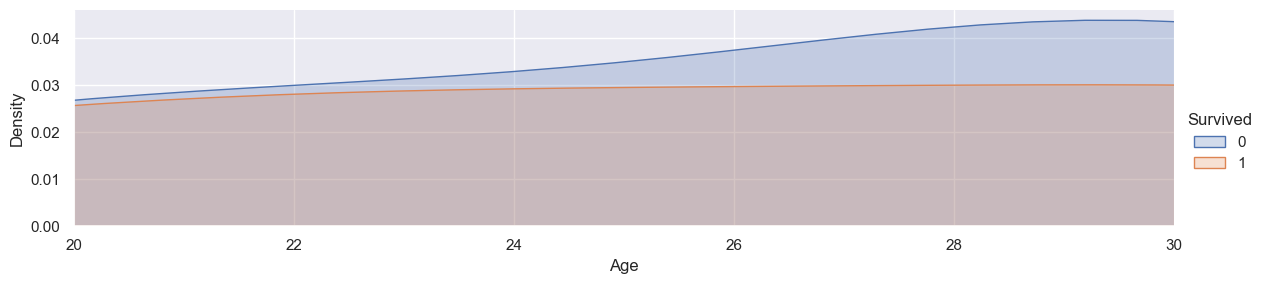

In [48]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()

plt.xlim(20, 30)

(30.0, 40.0)

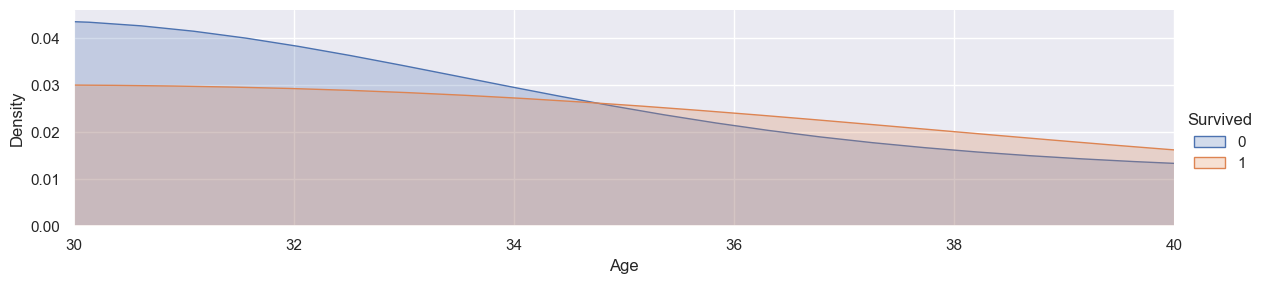

In [49]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()

plt.xlim(30, 40)

(40.0, 60.0)

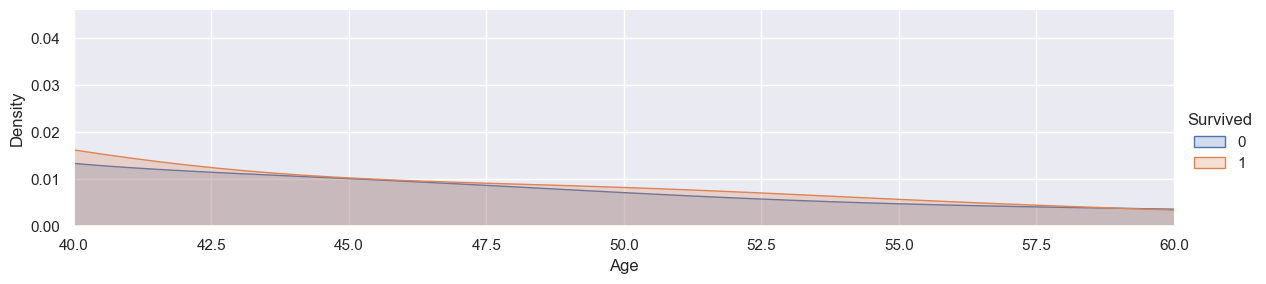

In [50]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()

plt.xlim(40, 60)

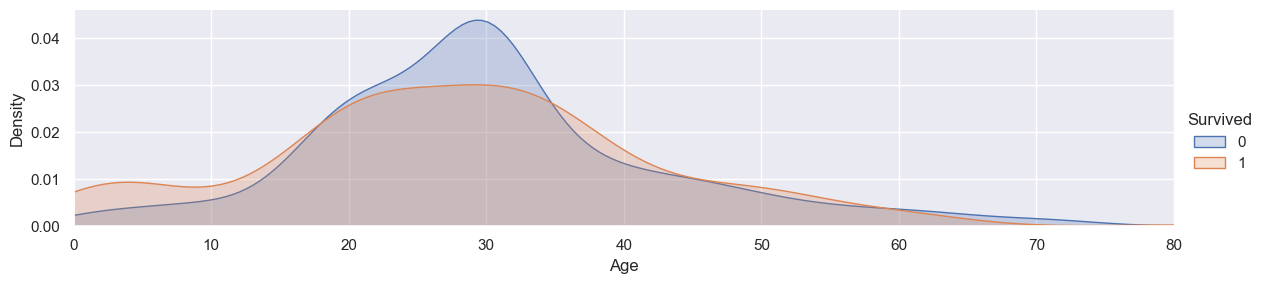

In [51]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, train["Age"].max()))
facet.add_legend()

plt.show(60)

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.1+ KB


### 4.4.2 Binning   
Binning/Converting Numerical Age To categurical Variable    

feature vectore map:    
child: 0    
young: 1    
adult: 2    
mid-age: 3  
senior: 4   

In [54]:
bins = [0, 16, 30, 42, 62, 100]
labels = [0, 1, 2, 3, 4]
for dataset in train_test_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=True)
    dataset['Age_bin'] = dataset['Age_bin'].astype('int')

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bin
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0,2


In [56]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bin
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0,2
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2,3
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0,3
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2,1


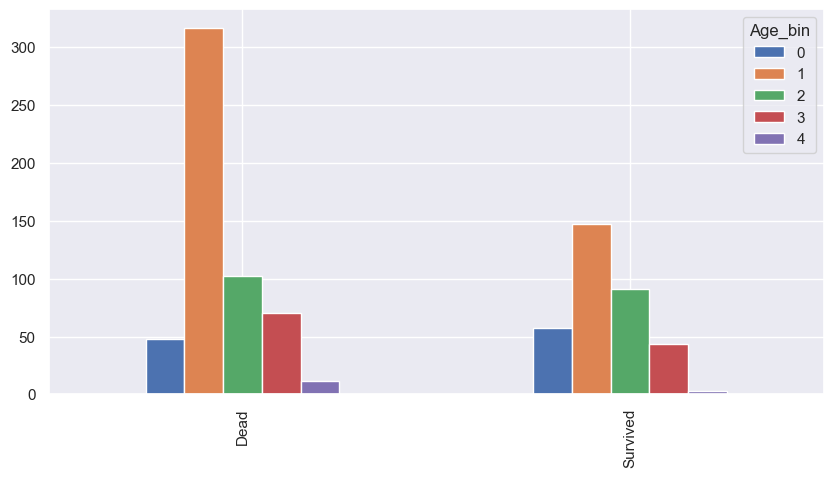

In [57]:
chart('Age_bin')

### 4.5 Embarked

#### 4.5.1 filling missing values

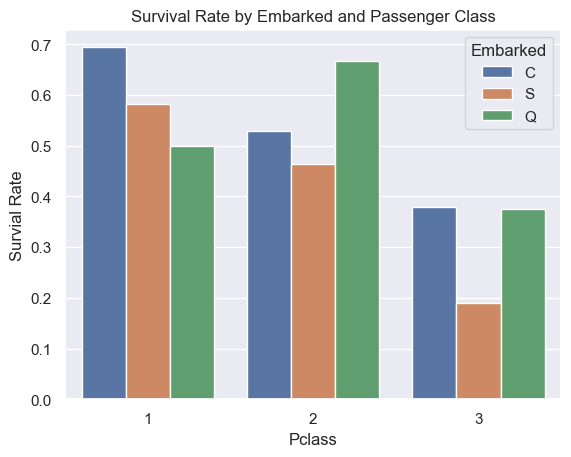

In [58]:
sns.barplot(data=train, x='Pclass',y='Survived', hue='Embarked', errorbar=None)
plt.title('Survival Rate by Embarked and Passenger Class')
plt.ylabel('Survial Rate')
plt.show()

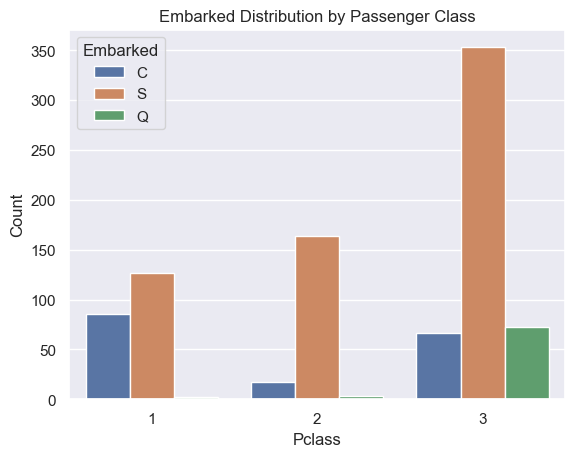

In [59]:
sns.countplot(data=train, x='Pclass', hue='Embarked')
plt.title('Embarked Distribution by Passenger Class')
plt.ylabel('Count')
plt.show()

more than 50% of 1st class are from S embark    
more than 50% of 2nd class are from S embark    
more than 50% of 3rd class are from S embark    

**fill out missing embark with S embark**


In [60]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [61]:
train['Embarked'].isnull().sum()

np.int64(0)

In [62]:
test['Embarked'].isnull().sum()

np.int64(0)

In [63]:
embarked_mapping = {'S': 0, 'Q': 1, 'C': 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [64]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bin
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,2,2,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,2


In [65]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bin
0,892,3,0,34.5,0,0,330911,7.8292,NaN,1,0,2
1,893,3,1,47.0,1,0,363272,7.0000,NaN,0,2,3
2,894,2,0,62.0,0,0,240276,9.6875,NaN,1,0,3
3,895,3,0,27.0,0,0,315154,8.6625,NaN,0,0,1
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,0,2,1


### 4.6 Fare

In [66]:
train['Fare'] = train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'))
test['Fare'] = test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'))

In [67]:
train['Fare'].isnull().sum()

np.int64(0)

In [68]:
test['Fare'].isnull().sum()

np.int64(0)

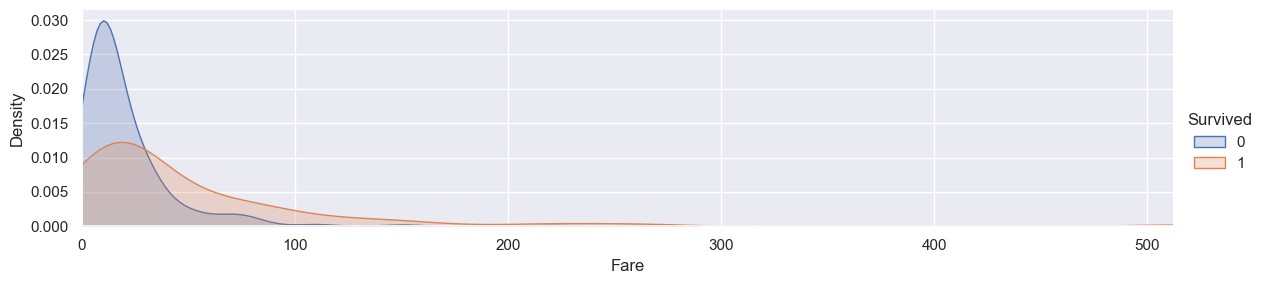

In [69]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

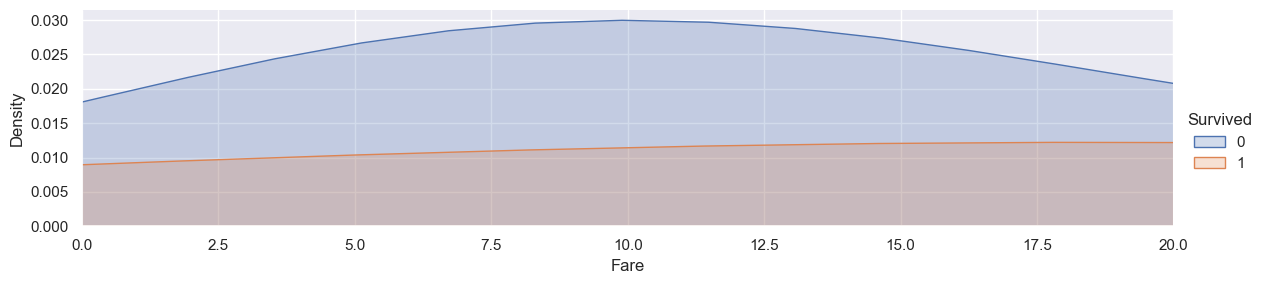

In [70]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.xlim(0, 20)

(0.0, 30.0)

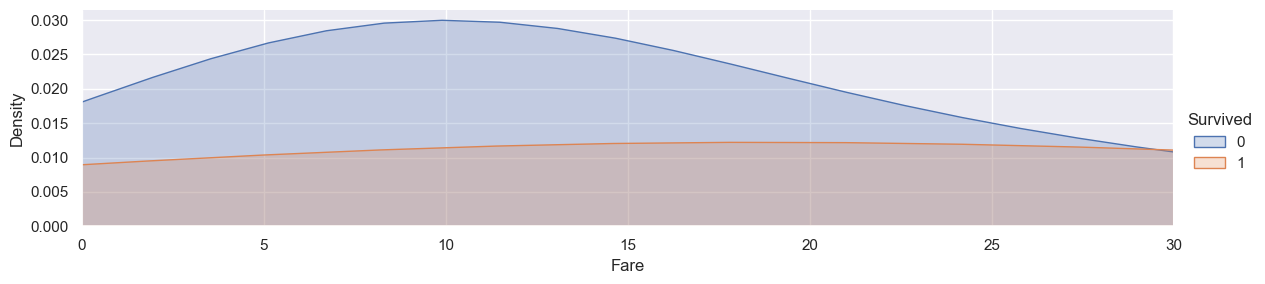

In [71]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.xlim(0, 30)

### 4.6.2 Binning Fare

In [72]:
bins = [0, 17, 30, 100, 200, np.inf]
labels = [0, 1, 2, 3, 4]
for dataset in train_test_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=bins, labels=labels, right=True)
    dataset['Fare_bin'] = dataset['Fare_bin'].astype('float')
    dataset['Fare_bin'] = dataset['Fare_bin'].fillna(dataset['Fare_bin'].mode()[0])

In [73]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Age_bin          0
Fare_bin         0
dtype: int64

In [74]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_bin,Fare_bin
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,2,2,2,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2,2,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,2,0.0


### 4.7 Cabin

In [75]:
train['Cabin'].value_counts()

Cabin
G6                 4
C23 C25 C27        4
B96 B98            4
F2                 3
D                  3
E101               3
C22 C26            3
F33                3
C83                2
C123               2
B28                2
D26                2
B58 B60            2
E33                2
D33                2
C52                2
F G73              2
B77                2
C93                2
B5                 2
D17                2
E24                2
E8                 2
E121               2
B35                2
E44                2
C92                2
C78                2
B20                2
C125               2
E67                2
D35                2
F4                 2
C2                 2
D36                2
C65                2
C124               2
B18                2
B57 B59 B63 B66    2
B49                2
B22                2
E25                2
D20                2
C68                2
B51 B53 B55        2
C126               2
E46                1
C85    

In [76]:
for dataset in train_test_data:
    dataset['CabinDeck'] = dataset['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'U')
    dataset['HasCabin'] = dataset['Cabin'].notnull().astype(int)
    dataset['CabinCount'] = dataset['Cabin'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
    dataset.drop('Cabin', axis=1, inplace=True)

In [77]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_bin,Fare_bin,CabinDeck,HasCabin,CabinCount
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0,1,0.0,U,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,2,2,2,2.0,C,1,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1,0.0,U,0,0
3,4,1,1,1,35.0,1,0,113803,53.1000,0,2,2,2.0,C,1,1
4,5,0,3,0,35.0,0,0,373450,8.0500,0,0,2,0.0,U,0,0


In [78]:
dataset['CabinDeck'].value_counts()

CabinDeck
U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: count, dtype: int64

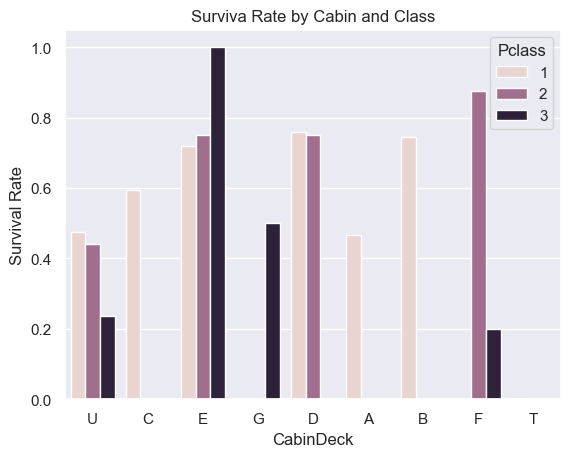

In [79]:
sns.barplot(data=train, x='CabinDeck', y='Survived', hue='Pclass', errorbar=None)
plt.title('Surviva Rate by Cabin and Class')
plt.ylabel('Survival Rate')
plt.show()

In [80]:
dataset['HasCabin'].value_counts()

HasCabin
0    327
1     91
Name: count, dtype: int64

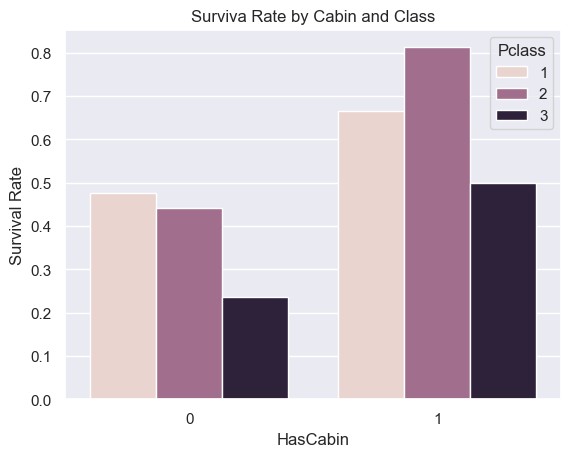

In [81]:
sns.barplot(data=train, x='HasCabin', y='Survived', hue='Pclass', errorbar=None)
plt.title('Surviva Rate by Cabin and Class')
plt.ylabel('Survival Rate')
plt.show()

In [82]:
train['CabinCount'].value_counts()

CabinCount
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

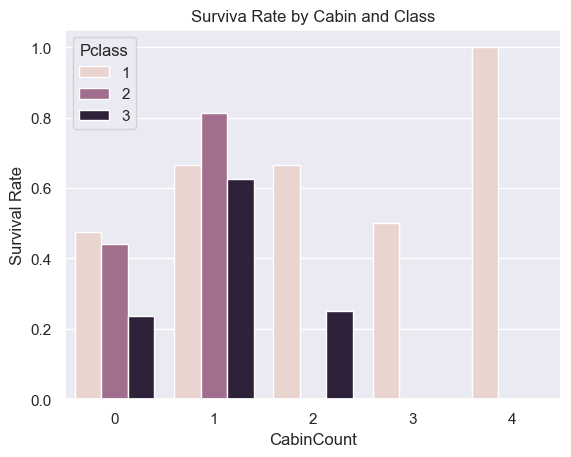

In [83]:
sns.barplot(data=train, x='CabinCount', y='Survived', hue='Pclass', errorbar=None)
plt.title('Surviva Rate by Cabin and Class')
plt.ylabel('Survival Rate')
plt.show()

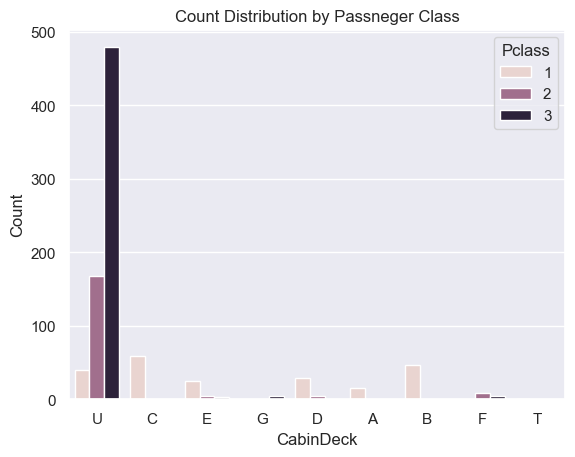

In [84]:
sns.countplot(data=train, x='CabinDeck', hue='Pclass')
plt.title('Count Distribution by Passneger Class')
plt.ylabel('Count')
plt.show()

transform Cabin to numerical Values

#### Aslo we can fill missing value for cabin with a new element like ('U')== Unknown

In [85]:
cabin_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7, 'U': 8}
for dataset in train_test_data:
    dataset['CabinDeck'] = dataset['CabinDeck'].map(cabin_mapping)

In [86]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_bin,Fare_bin,CabinDeck,HasCabin,CabinCount
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0,1,0.0,8,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,2,2,2,2.0,2,1,1
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1,0.0,8,0,0
3,4,1,1,1,35.0,1,0,113803,53.1000,0,2,2,2.0,2,1,1
4,5,0,3,0,35.0,0,0,373450,8.0500,0,0,2,0.0,8,0,0


### 4.8 FamilySize

In [87]:
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1
test['FamilySize'] = test['Parch'] + test['SibSp'] + 1

In [88]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [89]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_bin,Fare_bin,CabinDeck,HasCabin,CabinCount,FamilySize,IsAlone
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0,1,0.0,8,0,0,2,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,2,2,2,2.0,2,1,1,2,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1,0.0,8,0,0,1,1
3,4,1,1,1,35.0,1,0,113803,53.1000,0,2,2,2.0,2,1,1,2,0
4,5,0,3,0,35.0,0,0,373450,8.0500,0,0,2,0.0,8,0,0,1,1


(0.0, 11.0)

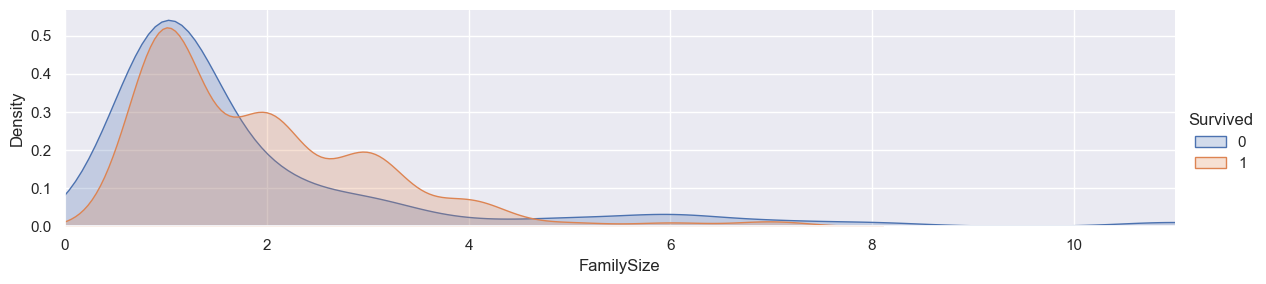

In [90]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'FamilySize', fill=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [91]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_bin,Fare_bin,CabinDeck,HasCabin,CabinCount,FamilySize,IsAlone
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0,0,1,0.0,8,0,0,2,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,2,2,2,2.0,2,1,1,2,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1,0.0,8,0,0,1,1
3,4,1,1,1,35.0,1,0,113803,53.1000,0,2,2,2.0,2,1,1,2,0
4,5,0,3,0,35.0,0,0,373450,8.0500,0,0,2,0.0,8,0,0,1,1


In [92]:
feature_drop = ['SibSp', 'Parch', 'Ticket']
train = train.drop(feature_drop, axis=1)
test = test.drop(feature_drop, axis=1)
train = train.drop(['PassengerId'], axis =1)

In [93]:
train_data = train.drop(['Survived'], axis =1)
target = train['Survived']

train_data.shape, target.shape

((891, 13), (891,))

In [94]:
train_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Age_bin,Fare_bin,CabinDeck,HasCabin,CabinCount,FamilySize,IsAlone
0,3,0,22.0,7.2500,0,0,1,0.0,8,0,0,2,0
1,1,1,38.0,71.2833,2,2,2,2.0,2,1,1,2,0
2,3,1,26.0,7.9250,0,1,1,0.0,8,0,0,1,1
3,1,1,35.0,53.1000,0,2,2,2.0,2,1,1,2,0
4,3,0,35.0,8.0500,0,0,2,0.0,8,0,0,1,1


In [95]:
train_data.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title         0
Age_bin       0
Fare_bin      0
CabinDeck     0
HasCabin      0
CabinCount    0
FamilySize    0
IsAlone       0
dtype: int64

### 5.Modeling

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [97]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf =[
    KNeighborsClassifier(n_neighbors=13),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(max_iter=1000)
]

In [98]:
clf_names = [
    'KNeighborsClassifier', 'DecisionTree', 'RandomForestClassifier', 'LogisticRegression'
]

In [99]:
for name, model in zip(clf_names, clf):
    scoring = 'accuracy'
    result = cross_val_score(model, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
    print(f"{name}: Mean Accuracy = {result.mean()*100:.2f}%, Std Dec = {result.std():.4f}")

KNeighborsClassifier: Mean Accuracy = 72.50%, Std Dec = 0.0401
DecisionTree: Mean Accuracy = 78.01%, Std Dec = 0.0315
RandomForestClassifier: Mean Accuracy = 80.25%, Std Dec = 0.0260
LogisticRegression: Mean Accuracy = 81.48%, Std Dec = 0.0263


In [100]:
test_ids = test['PassengerId']
test.drop('PassengerId', axis=1, inplace=True)


In [101]:
best_model = LogisticRegression(max_iter=1000)
best_model.fit(train_data, target)
prediction = best_model.predict(test)
submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Survived': prediction
})

In [102]:
submission.to_csv('final_submission_titanic.csv', index=False)
print(submission.head(10))

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0


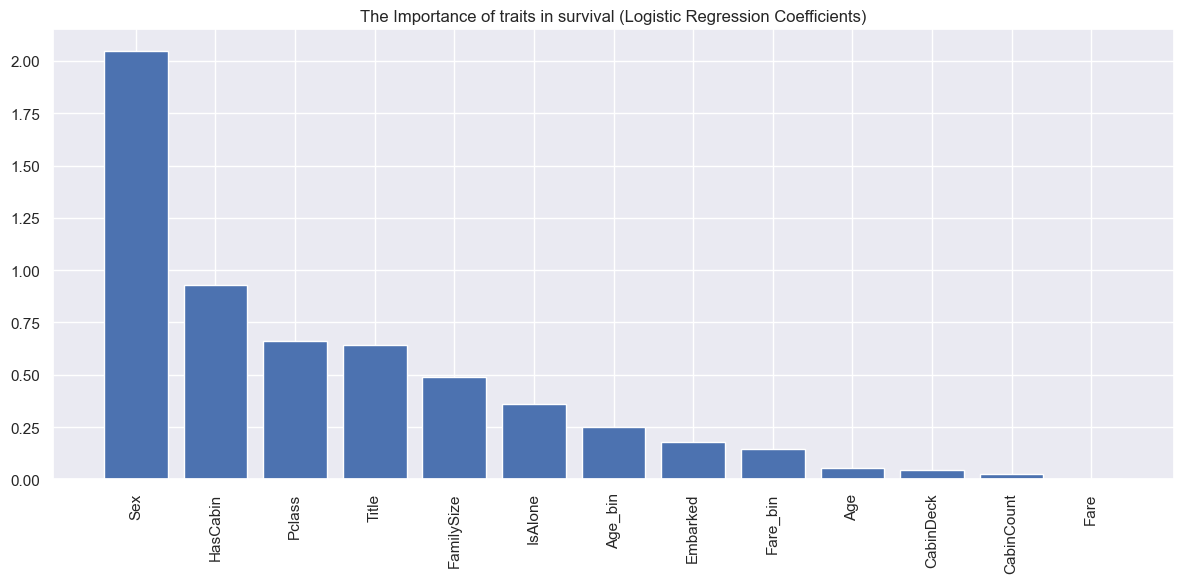

In [103]:
features = train_data.columns
importance = best_model.coef_[0]
indices =np.argsort(np.abs(importance))[::-1]

plt.figure(figsize=(12,6))
plt.title("The Importance of traits in survival (Logistic Regression Coefficients)")
plt.bar(range(len(features)), np.abs(importance[indices]), align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

### Have A Good Code :)